In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [13]:
df = pd.read_excel("Dataset1.xlsx")
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [29]:
#Calculate the mean, median, and standard deviation for the "Area" and "Perimeter" columns. What do these values indicate about the distribution of these features?


beans = {
    'Area': {
        'Mean': df['Area'].mean(),
        'Median': df['Area'].median(),
        'Standard Deviation': df['Area'].std()
    },
    'Perimeter': {
        'Mean': df['Perimeter'].mean(),
        'Median': df['Perimeter'].median(),
        'Standard Deviation': df['Perimeter'].std()
    }
}
beans

{'Area': {'Mean': 53048.284549261625,
  'Median': 44652.0,
  'Standard Deviation': 29324.095716881915},
 'Perimeter': {'Mean': 855.283458599662,
  'Median': 794.9409999999999,
  'Standard Deviation': 214.28969589196163}}

In [45]:
#Find the range and interquartile range (IQR) for "MajorAxisLength" and "MinorAxisLength." What do these values suggest about the shape of the objects in the dataset?


if 'MajorAxisLength' in df.columns and 'MinorAxisLength' in df.columns:
   
    major_axis_range = df['MajorAxisLength'].max() - df['MajorAxisLength'].min()
    minor_axis_range = df['MinorAxisLength'].max() - df['MinorAxisLength'].min()
    
    Q1_major = df['MajorAxisLength'].quantile(0.25)
    Q3_major = df['MajorAxisLength'].quantile(0.75)
    IQR_major = Q3_major - Q1_major
    
    Q1_minor = df['MinorAxisLength'].quantile(0.25)
    Q3_minor = df['MinorAxisLength'].quantile(0.75)
    IQR_minor = Q3_minor - Q1_minor
    
    results = {
        'MajorAxisLength': {
            'Range': major_axis_range,
            'IQR': IQR_major
        },
        'MinorAxisLength': {
            'Range': minor_axis_range,
            'IQR': IQR_minor
        }
    }
else:
    results = "Error: Required columns 'MajorAxisLength' and 'MinorAxisLength' not found in the DataFrame."
results

{'MajorAxisLength': {'Range': 555.258988478042, 'IQR': 123.20598139967677},
 'MinorAxisLength': {'Range': 337.6858433770959, 'IQR': 41.191057304440534}}

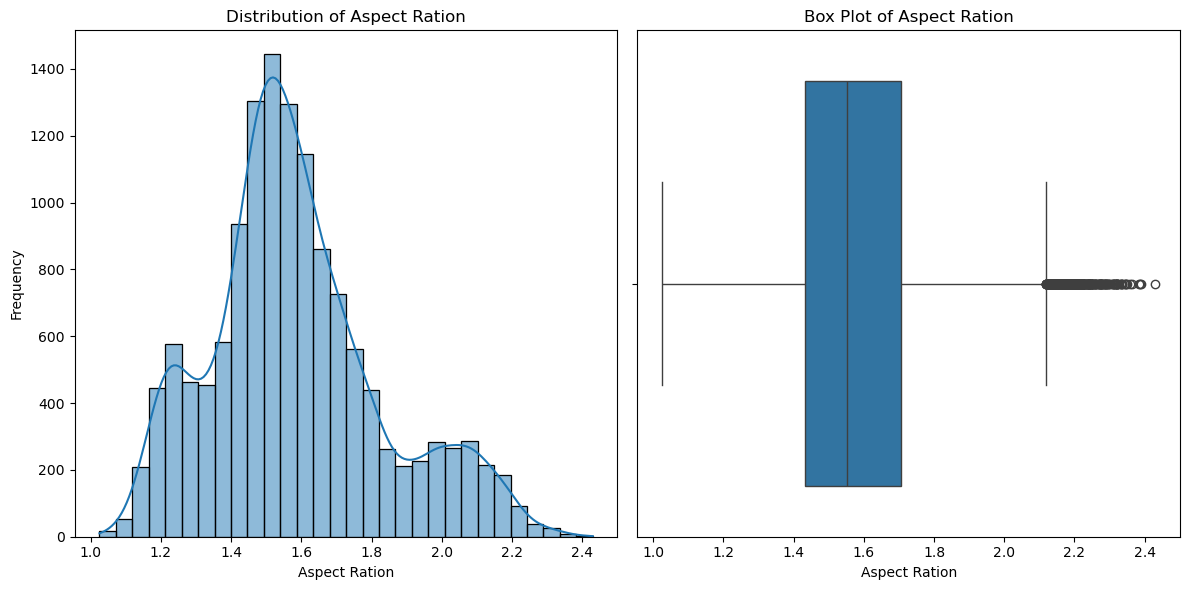

{'Mean': 1.58330636832762,
 'Median': 1.5511315303531137,
 'Standard Deviation': 0.24664994637841706,
 'Range': 1.405438850769858,
 'IQR': 0.27482947575500005}

In [71]:
#Analyze the distribution of the "AspectRation." What does the aspect ratio reveal about the shapes of the objects?

if 'AspectRation' in df.columns:
    
    mean_Aspect_Ration = df['AspectRation'].mean()
    median_Aspect_Ration = df['AspectRation'].median()
    std_Aspect_Ration = df['AspectRation'].std()
    range_Aspect_Ration = df['AspectRation'].max() - df['AspectRation'].min()
    Q1_Aspect_Ration = df['AspectRation'].quantile(0.25)
    Q3_Aspect_Ration = df['AspectRation'].quantile(0.75)
    IQR_Aspect_Ration = Q3_Aspect_Ration - Q1_Aspect_Ration
    
    stats = {
        'Mean': mean_Aspect_Ration,
        'Median': median_Aspect_Ration,
        'Standard Deviation': std_Aspect_Ration,
        'Range': range_Aspect_Ration,
        'IQR': IQR_Aspect_Ration
    }
    
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df['AspectRation'], bins=30, kde=True)
    plt.title('Distribution of Aspect Ration')
    plt.xlabel('Aspect Ration')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['AspectRation'])
    plt.title('Box Plot of Aspect Ration')
    plt.xlabel('Aspect Ration')

    plt.tight_layout()
    plt.show()
else:
    stats= "Error: Required column 'AspectRation' not found in the DataFrame."

stats

In [79]:
#How many unique "Class" categories are present in the dataset?

if 'Class' in df.columns:
  
    unique_classes = df['Class'].nunique()
    unique_class_values = df['Class'].unique() 
else:
    unique_classes = "Error: Required column 'Class' not found in the DataFrame."

unique_classes, unique_class_values

(7,
 array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
       dtype=object))

In [83]:
#Calculate the frequency distribution of each "Class." Which class appears the most, and which appears the least?


if 'Class' in df.columns:
    frequency_distribution = df['Class'].value_counts()
    
    most_frequent_class = frequency_distribution.idxmax()
    least_frequent_class = frequency_distribution.idxmin()
    
    most_frequent_count = frequency_distribution.max()
    least_frequent_count = frequency_distribution.min()
else:
    frequency_distribution = "Error: Required column 'Class' not found in the DataFrame."

frequency_distribution, (most_frequent_class, most_frequent_count), (least_frequent_class, least_frequent_count)

(Class
 DERMASON    3546
 SIRA        2636
 SEKER       2027
 HOROZ       1928
 CALI        1630
 BARBUNYA    1322
 BOMBAY       522
 Name: count, dtype: int64,
 ('DERMASON', 3546),
 ('BOMBAY', 522))

In [153]:
#Create a scatter plot for "Roundness" vs. "Compactness" for each class. What patterns can you identify from the scatter plot?
if 'Roundness' in df.columns and 'Compactness' in df.columns and 'Class' in df.columns:
    # Create a scatter plot
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Roundness', y='Compactness', hue='Class', data=df, palette='deep', alpha=0.7)
    plt.title('Scatter Plot of Roundness vs. Compactness by Class')
    plt.xlabel('Roundness')
    plt.ylabel('Compactness')
    plt.grid(True)
    plt.legend(title='Class')
    plt.show()
else:
    print("Error: Required columns 'Roundness', 'Compactness', and 'Class' not found in the DataFrame.")

Error: Required columns 'Roundness', 'Compactness', and 'Class' not found in the DataFrame.


In [163]:

#Question 2 : Adult Dataset



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_excel("dataset2.xlsx")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [165]:
#Data Preprocessing: Outline the steps you would take to preprocess the data, including handling categorical variables, normalizing numerical features, and dealing with any missing values.
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [188]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
                    ..
capital-loss_3004    0
capital-loss_3683    0
capital-loss_3770    0
capital-loss_3900    0
capital-loss_4356    0
Length: 222, dtype: int64

In [186]:
#Data Preprocessing: Outline the steps you would take to preprocess the data, including handling categorical variables, normalizing numerical features, and dealing with any missing values.


X = df.drop('salary', axis=1)
y = df['salary']

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

pipeline = Pipeline([
    ('transformer', transformer),
    ('model', RandomForestClassifier()) 
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      4942
        >50K       0.69      0.58      0.63      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.75      0.76      6513
weighted avg       0.83      0.83      0.83      6513

Accuracy: 0.8347919545524336


In [192]:
#Model Selection: Chooseat least three machine learning algorithms (e.g., Logistic Regression, Decision Tree, Random Forest, Gradient Boosting) to train and evaluate on this classification task. Justify why you selected these models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
pipelines = {
    'logistic_regression': Pipeline([
        ('transformer', transformer),
        ('model', LogisticRegression(max_iter=1000)) 
    ]),
    'decision_tree': Pipeline([
        ('transformer', transformer),
        ('model', DecisionTreeClassifier())
    ]),
    'random_forest': Pipeline([
        ('transformer', transformer),
        ('model', RandomForestClassifier())
    ])
}

for model_name, pipeline in pipelines.items():
  print(f"Evaluating {model_name}:")
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  print(classification_report(y_test, y_pred))
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("-" * 30)


Evaluating logistic_regression:
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      4942
        >50K       0.70      0.55      0.62      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.74      0.76      6513
weighted avg       0.83      0.83      0.83      6513

Accuracy: 0.8344848764010441
------------------------------
Evaluating decision_tree:
              precision    recall  f1-score   support

       <=50K       0.86      0.85      0.85      4942
        >50K       0.54      0.56      0.55      1571

    accuracy                           0.78      6513
   macro avg       0.70      0.70      0.70      6513
weighted avg       0.78      0.78      0.78      6513

Accuracy: 0.777214801166897
------------------------------
Evaluating random_forest:
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      4942
        >50K       0.68      0.58 

In [194]:
#Model Evaluation: Evaluate the models using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC-AUC score. Which model performs the best, and what might explain this result?

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

model_results = {}
for model_name, pipeline in pipelines.items():
  print(f"Evaluating {model_name}:")
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')  
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')

  try:
      roc_auc = roc_auc_score(y_test, y_pred)
  except ValueError:
      roc_auc = "Not applicable for multiclass"

  print(classification_report(y_test, y_pred))
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-Score:", f1)
  print("ROC-AUC:", roc_auc)
  print("-" * 30)

  model_results[model_name] = {
      'accuracy': accuracy,
      'precision': precision,
      'recall': recall,
      'f1_score': f1,
      'roc_auc': roc_auc
  }

best_model = max(model_results, key=lambda model: model_results[model]['f1_score'])
print(f"The best performing model is: {best_model}")

# Explanation of the results 
# - Random Forest might perform better than Logistic Regression or Decision Tree if the dataset has complex relationships or interactions between features.
# - The best model might be the one that best balances precision and recall (F1-score), achieving a good trade-off between identifying true positives and minimizing false positives/negatives.


Evaluating logistic_regression:
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      4942
        >50K       0.70      0.55      0.62      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.74      0.76      6513
weighted avg       0.83      0.83      0.83      6513

Accuracy: 0.8344848764010441
Precision: 0.8260967892411615
Recall: 0.8344848764010441
F1-Score: 0.8276462608471562
ROC-AUC: Not applicable for multiclass
------------------------------
Evaluating decision_tree:
              precision    recall  f1-score   support

       <=50K       0.86      0.85      0.85      4942
        >50K       0.54      0.56      0.55      1571

    accuracy                           0.78      6513
   macro avg       0.70      0.70      0.70      6513
weighted avg       0.78      0.78      0.78      6513

Accuracy: 0.777214801166897
Precision: 0.7800194084475063
Recall: 0.777214801166897
F1-Score: 0.7785534

In [206]:
#Feature Importance Analysis: Use feature importance techniques (e.g., coefficients from Logistic Regression, feature importance from Decision Trees) to identify the most influential features for predicting "salary." How do features such as "age," "education-num," and "occupation" impact the predictions?

from sklearn.linear_model import LogisticRegression


if 'random_forest' in pipelines:
  model = pipelines['random_forest']['model']
  importances = model.feature_importances_
  feature_names = X.columns

  feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
  feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
  print("Feature Importance (Random Forest):")
  print(feature_importance_df)

  for feature in ['age', 'education-num', 'occupation']:
    if feature in feature_importance_df['Feature'].values:
      importance = feature_importance_df.loc[feature_importance_df['Feature'] == feature, 'Importance'].iloc[0]
      print(f"- {feature}: Importance = {importance:.4f}").




SyntaxError: invalid syntax (2052222162.py, line 19)